# GEO3466 Practical 3 Biogeochemical Argo Float Data

## Overview of the Practical

In this practical we will learn how to process data from a Biogeochemical Argo (BGC-Argo) float. You will select a region of interest with an available BGC-Argo float and run through a series of processing steps, finishing by plotting a time-series of physical (temperature and salinity), and biogeochemical (chlorophyll-a concentration, particulate backscattering and dissolved oxygen) data. This data will then be used as a basis to write a report for your summative assessment in GEO3466. 

## Aims of the Practical and Intended Learning Outcomes

This practical will show you where to access BGC-Argo float data and the process required to download it. You will then learn how to process the BGC-Argo data to a basic level and learn how to plot it in Python. You will then use the data for interpreting biological oceanography in a selected region and write a report for your summative assessment in GEO3466. As an outcome of this practical you will

1. Understand where and how to access BGC-Argo data.
2. Be able to read BGC-Argo data using Python.
3. Be able to plot BGC-Argo data using Python.
4. Use BGC-Argo to interpret biological oceanography in region of interest.

For a detailed guide on BGC-Argo data, please refer to Bittig et al. (2019, https://doi.org/10.3389/fmars.2019.00502).

## Python packages required for the practical

Please note that this practical is designed such that each cell (block of Python code) is run after the previous cell. If you clear or restart the practical, you will need to run through each cell from the start. 

Please run the following lines of code to ensure you have the right packages installed for the practical. To do this click on the code (cell) below and then click the run button at the top of the page.

In [ ]:
#Import all packages required for practical
import numpy as np
import numpy.ma as ma
import math as mt
import julian
import datetime
import scipy
import matplotlib as mpl
import netCDF4 as nc
import pandas as pd
from math import nan
from netCDF4 import Dataset
from matplotlib import pyplot as plt 
from matplotlib.colors import LogNorm
from scipy import interpolate
from scipy import signal

## Viewing and downloading BGC-Argo float data

### Oceanographic Autonomous Observations (OAO) portal

A nice visualisation portal for viewing BGC-Argo float data can be found at the Oceanographic Autonomous Observations (OAO) virtual platform based in Villefranche-sur-mer (France). Please click on the following link

http://www.oao.obs-vlfr.fr/maps/en/

You will see a webpage that looks like the following

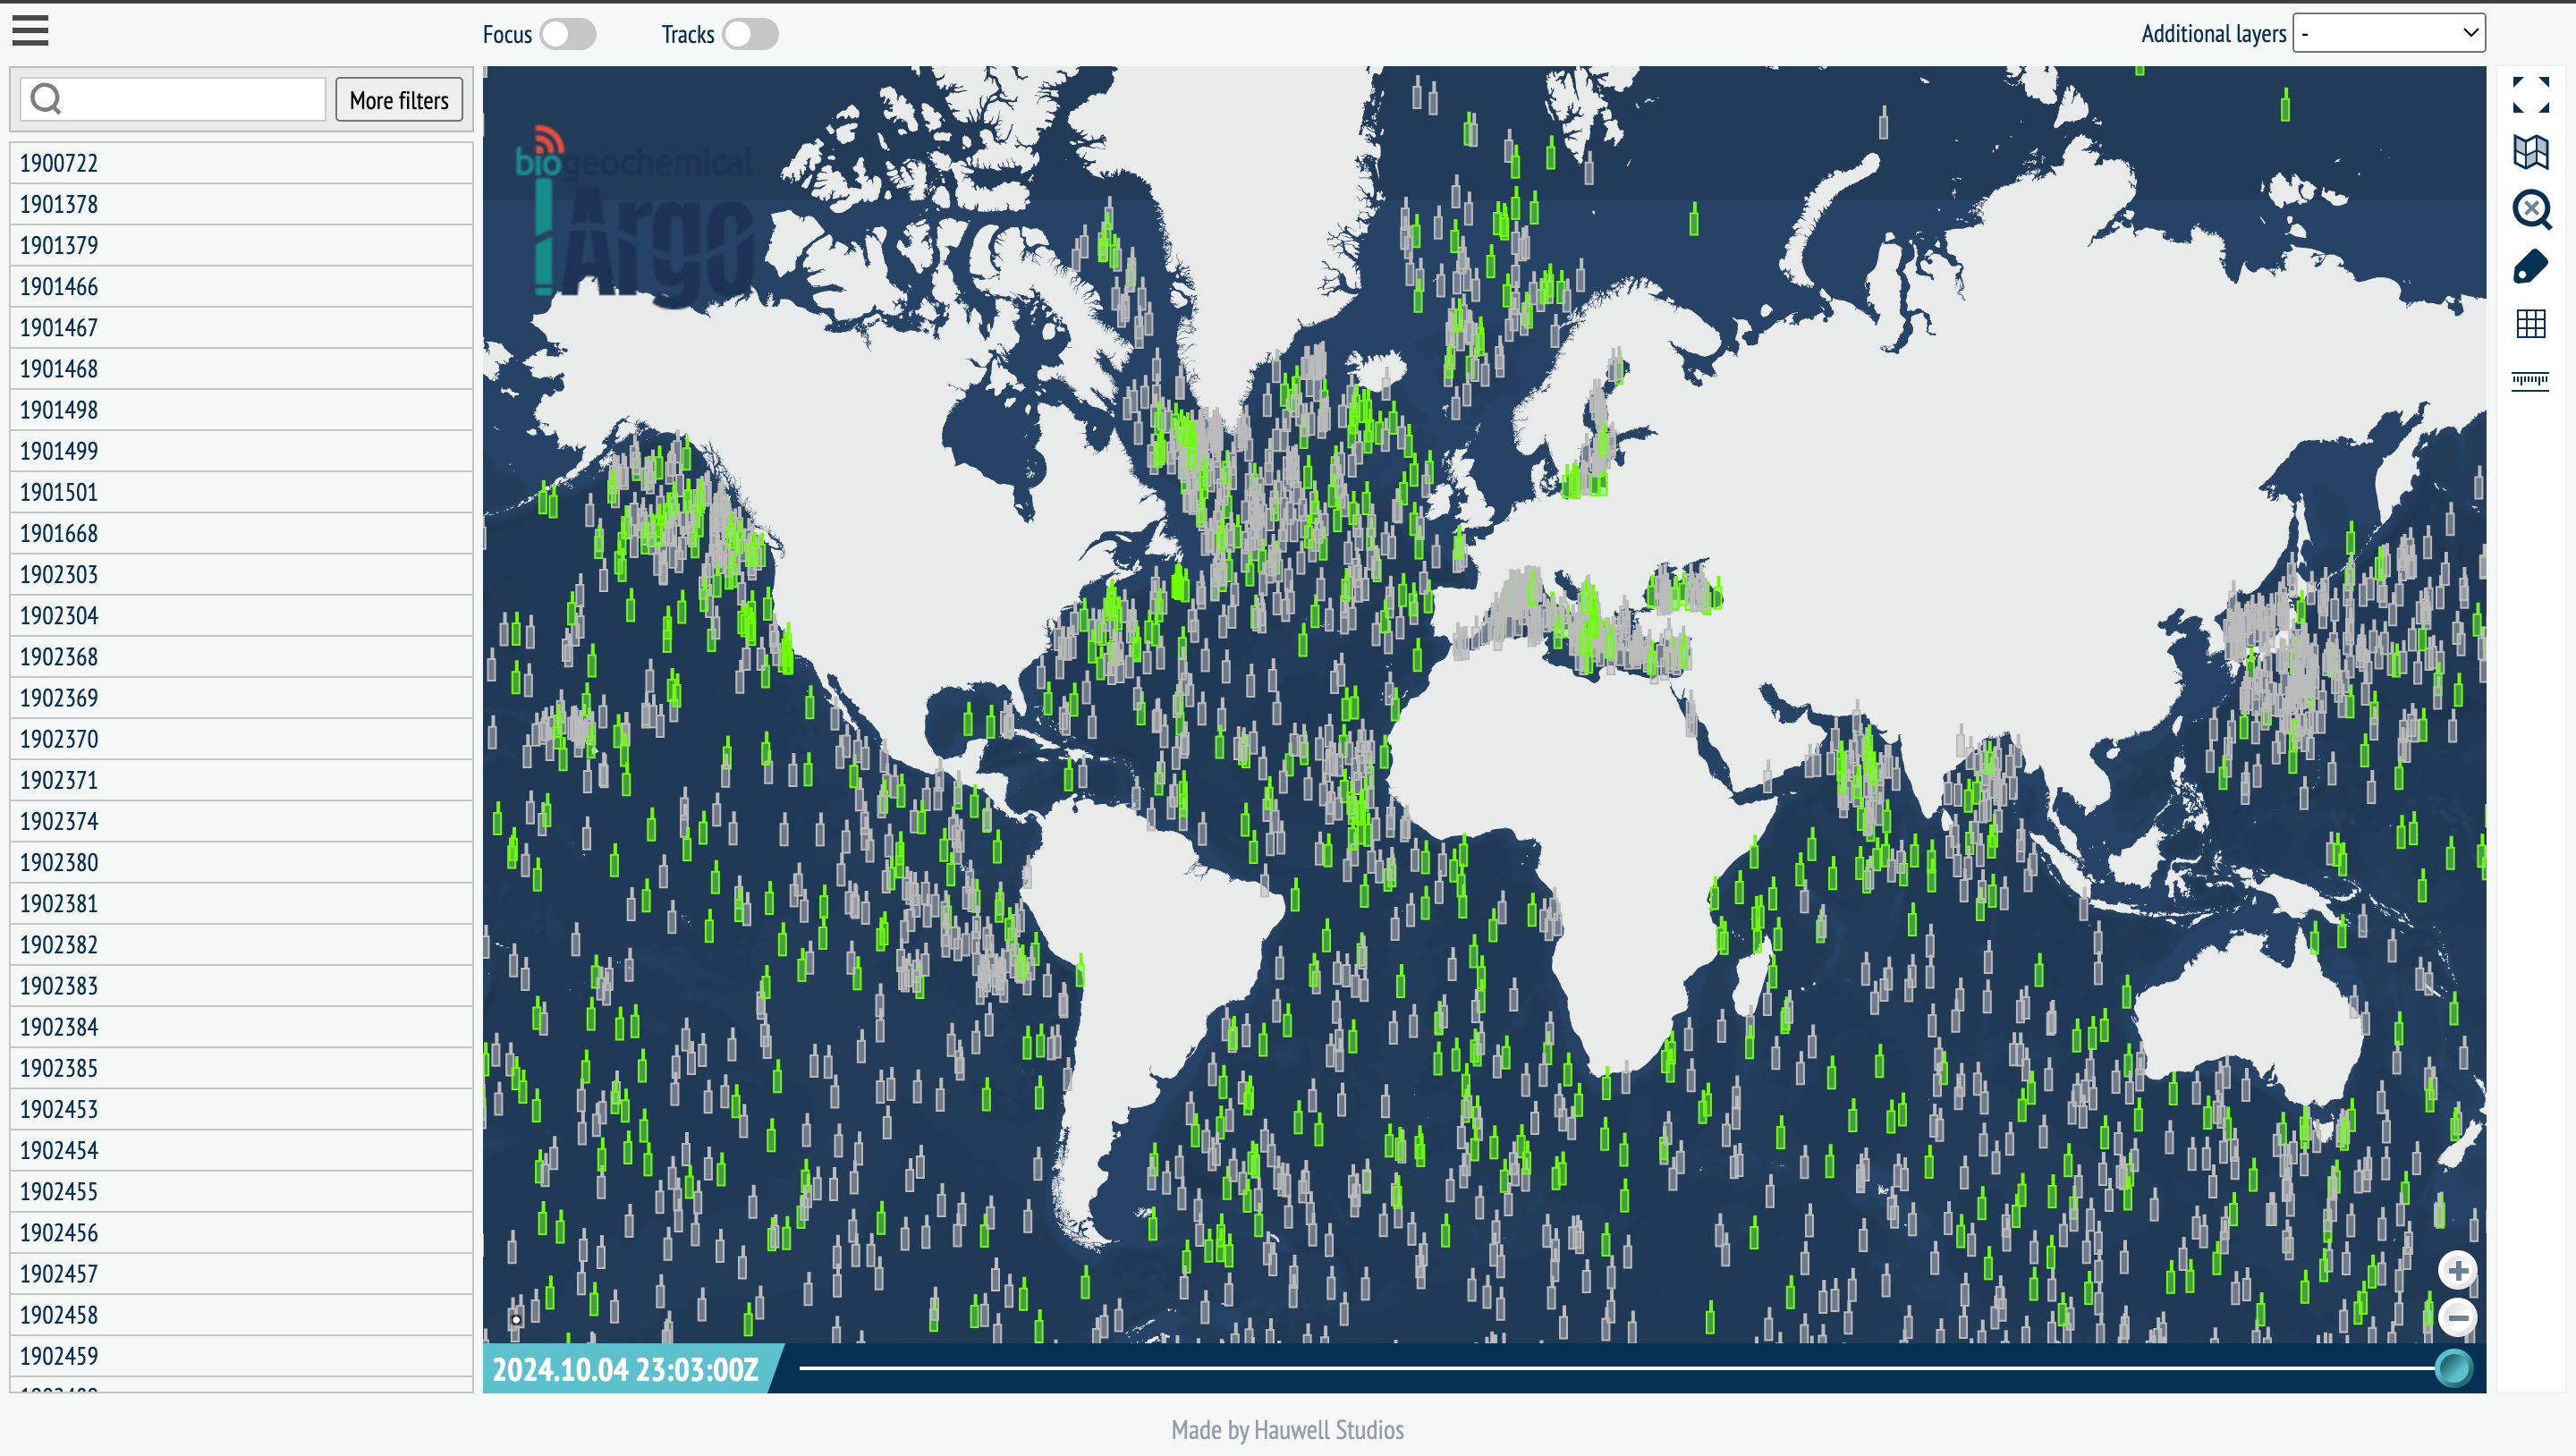

You will see the locations of BGC-Argo float data in different regions of the ocean. It is worth noting that not all available BGC-Argo floats are on this webpage. Nonetheless, it is a useful webpage for visualising many of the BGC-Argo floats in the ocean. Familiarise yourself with the webpage and note down the following features.

- Float WMO numbers are on the left-hand side bar.
- The bars at the top allow you to focus in on floats and tracks.
- Float status is also shown on the map according to colour, where: green indicates data that was last communicated within 12 days; and grey floats refer to floats that last communicated data over 30 days ago, and thus likely to have reached the end of their lifespan.
- Top right bar allows you to change the background ocean image. 

### Exploring BGC-Argo float data on the OAO portal

If you click on a float on the OAO portal some additional information appears

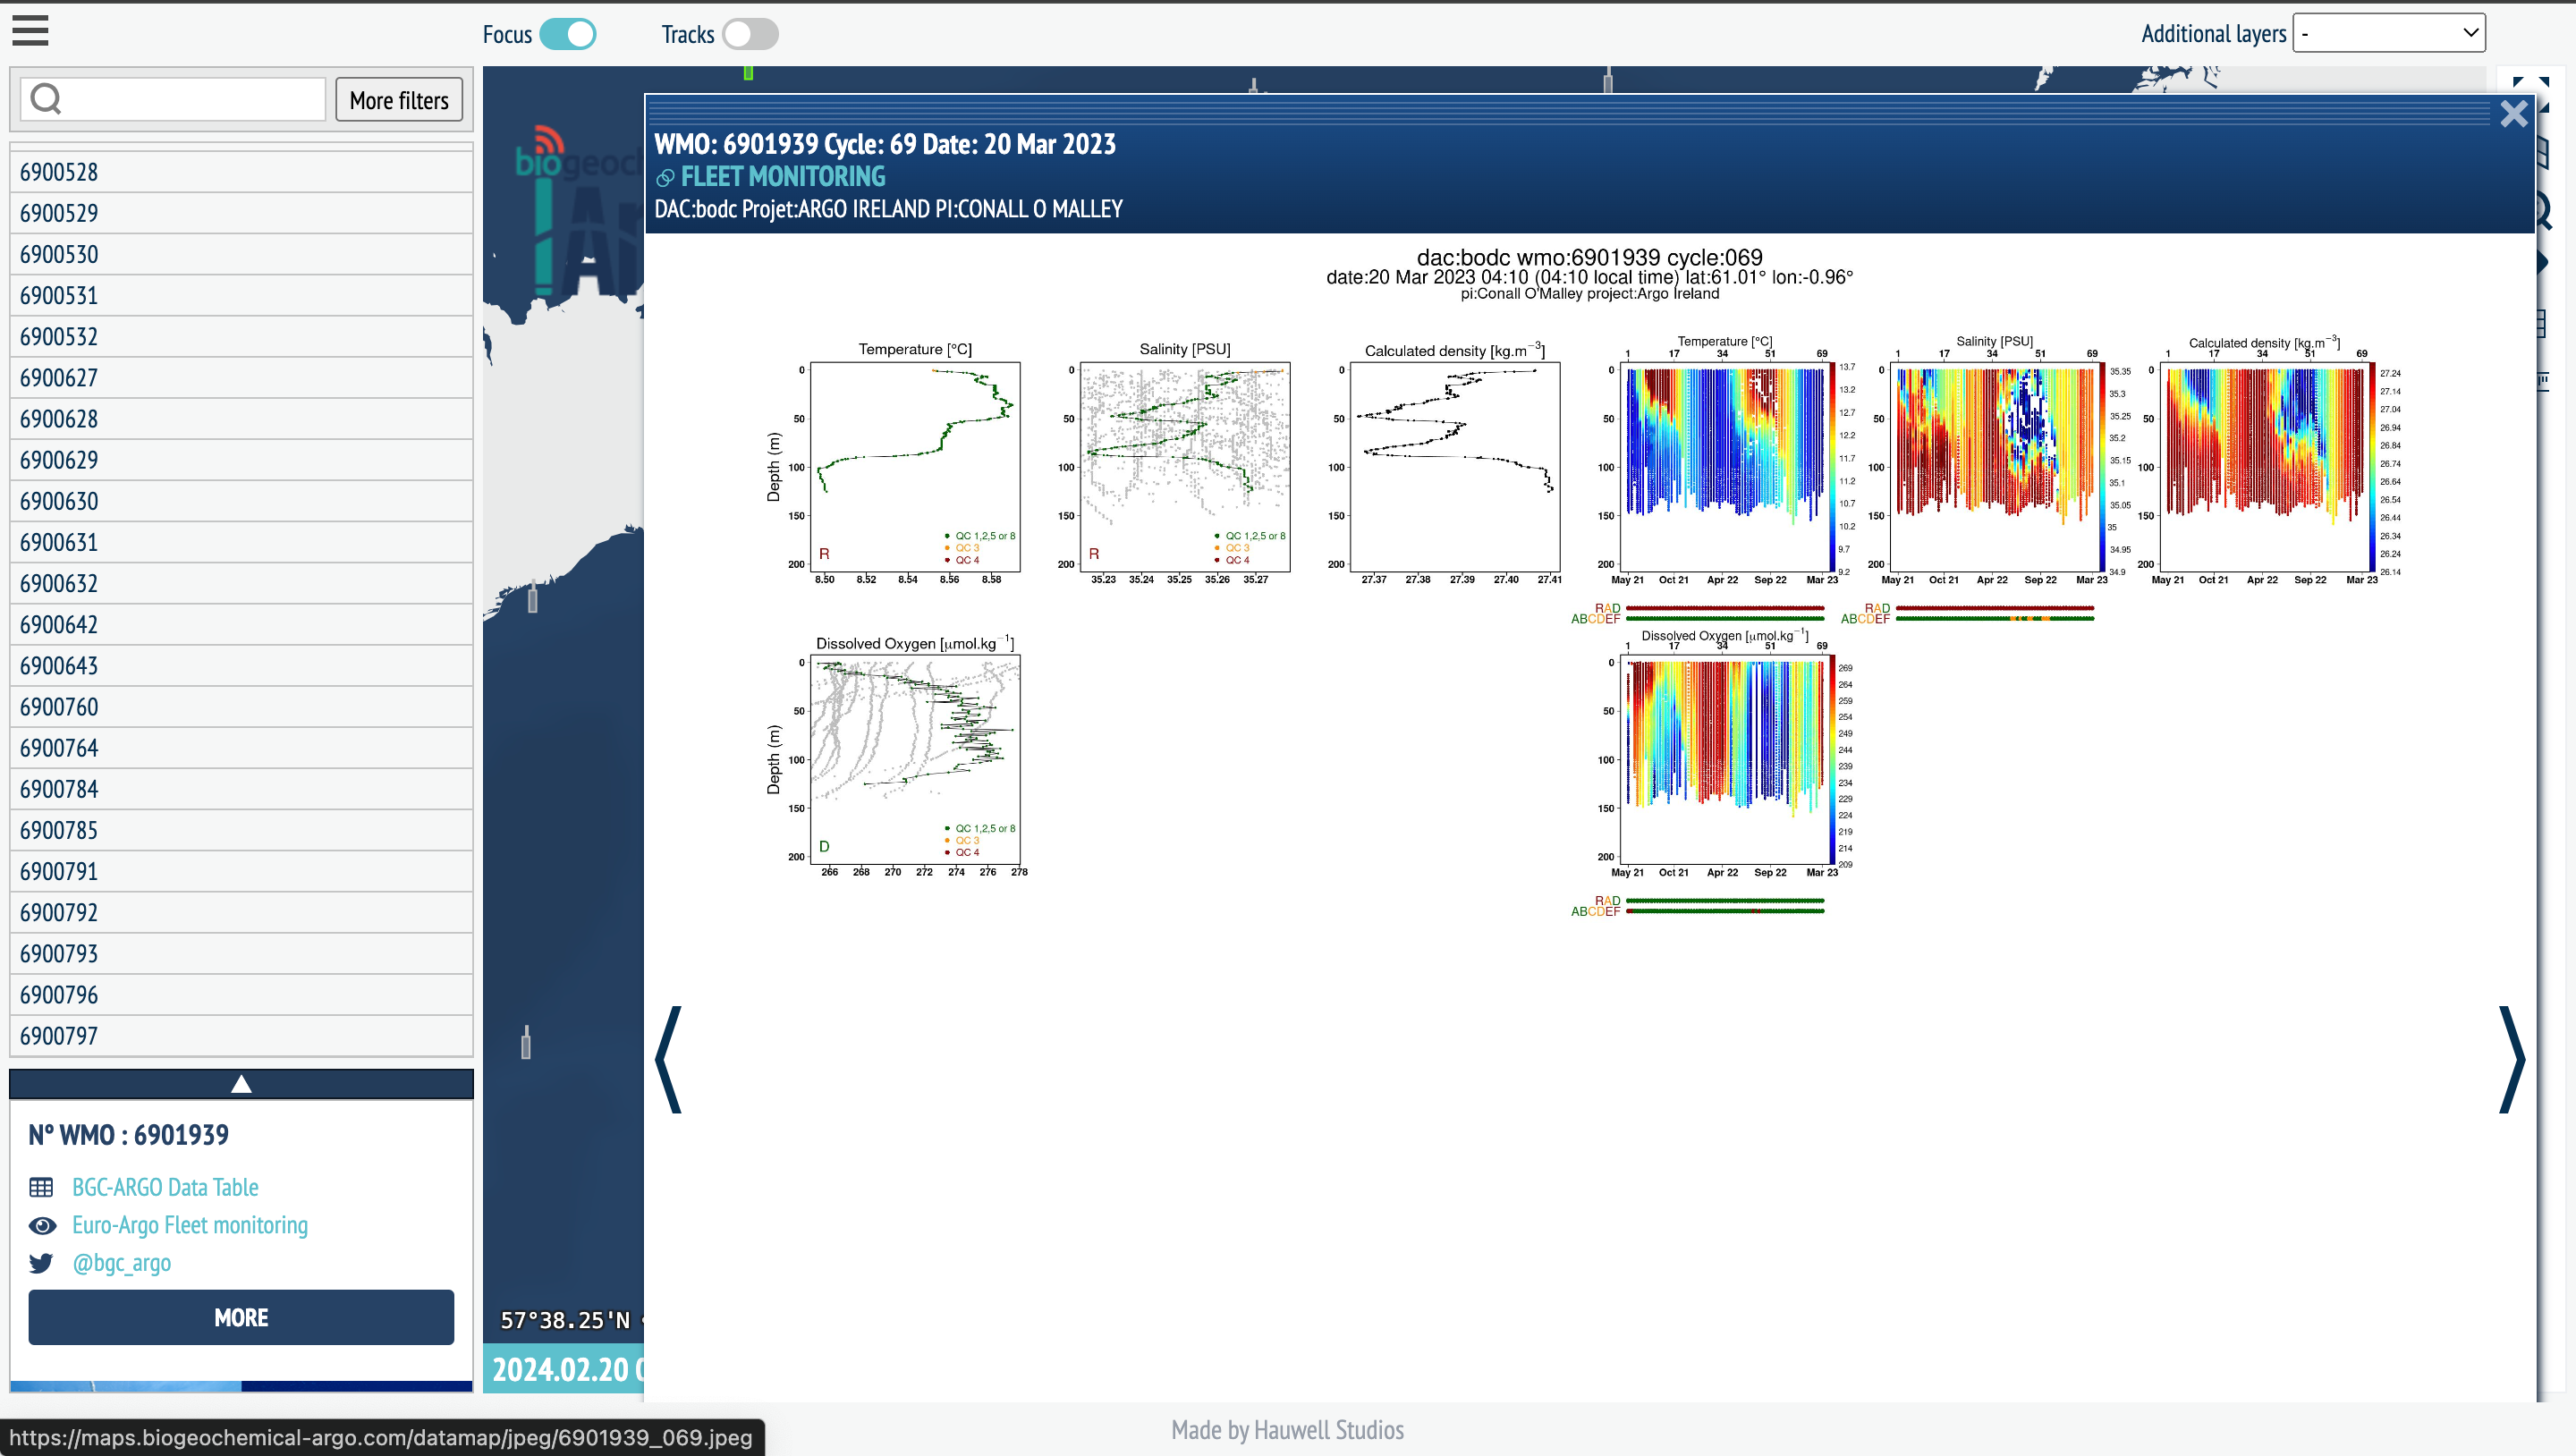

- At the bottom of the left-hand panel on the webpage some links are provided to information about the float. Note there might be some small differences between this info and the float files we use in this practical, as float data are often reprocessed, and info updated.
- If you click on a float, and then click on one profile (dot on the float path) and an additional webpage will pop up (see figure above) showing data from the float and what variables it includes. In this practical we will use floats with data for temperature, salinity, dissolved oxygen, chlorophyll-a (Chl-a) and backscattering by particles at 700 nm.

Every BGC-float has a WMO number (that stands for the World Meteorological Organization) on the left hand panel. It is useful to note this number down when downloading float data, as it provides a unique identifying number.

### Downloading BGC-Argo float data

Bittig et al. (2019, https://doi.org/10.3389/fmars.2019.00502) describe (see their Table 5) the different levels of BGC-Argo data available to download. Typically, they are "real-time", "delayed-mode" and "all-cycle" data. Data is available for core-Argo variables (c-files), biogeochemical Argo variables (b-files) and integrated variables data (s-files). Data files are provided in netCDF format.  

In this practical we will use "all-cycle" s-files, defined by float number (e.g. 6901437_Sprof.nc). These files include all profiles from a BGC-Argo float, that generally have been controlled to a certain level for data quality (e.g. for example we will use the Chl-a adjusted profiles that include a quenching correction) and the b-file data have been adjusted to the same depth (pressure) as the c-file data, making it easier to work on both core-Argo and biogeochemical Argo variables. Data is downloaded through FTP servers. 

In this practical, data from 10 BGC-Argo floats have been downloaded already (######\_Sprof.nc files). However, if you are interested in downloading data yourself, here are some steps to do it.

1. Find the WMO float number of interest. You can use the OAO portal as a guide for some floats (e.g. 6901437)
2. Connect to an BGC-Argo FTP server (e.g. ifremer). There are around 11 data centres in general. In Europe we typically use CORIOLIS or BODC. Not all floats may be with both centres. The ifremer FTP site for CORIOLIS is ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/.
3. Connect as a "Guest"
4. Find the folder with the float number and download the s-files (e.g. 6901437_Sprof.nc). Note not all floats have s-file data. 

For this practical, the 10 BGC-Argo floats that have been downloaded include data for (sensors on the float that measure): Pressure (dBar, we assume equivalent to depth in meters); Temperature ($^{o}C$); Salinity (PSU); Dissolved Oxygen (micro mol kg$^{-3}$); Chlorophyll-a (mg m$^{-3}$); and backscattering by particles (at wavelength of 700 nm, m$^{-1}$). These floats have all operated for 300 days or longer, and thus provide data on a full seasonal cycle (approximately) or longer. These floats have also been tested on the Python code produced in this practical. Please note that if you download data from a different float, it may not work with this software, may not contain data of sufficient length for the practical (300 days operating), and may not have data for all variables we will use.

**NOTE: The files we use in this practical may not be the latest version on the CORIOLIS website. The files are sometimes reprocessed and updated.**

## Selecting a BGC-Argo float and region of interest

In total, six regions have been selected for this practical, and a total of 10 BGC-Argo floats. They include

- The North Atlantic 
    - 6901523
    - 6901515
- The southern South Atlantic    
    - 6901582
- The South Pacific 
    - 6901658
- The northern Red Sea
    - 6901573
- The Black Sea
    - 6900807
- The Eastern Mediterranean Sea
    - 6901528
- The Western Mediterranean Sea
    - 6901648
- The Southern Ocean 
    - 6901004
    - 6901585

Please select one of these regions of interest, and one BGC-Argo float. Use the OAO portal to help decide which float you would like to use by typing the float numbers into the search bar (top left of the portal), as shown in the figure below. 

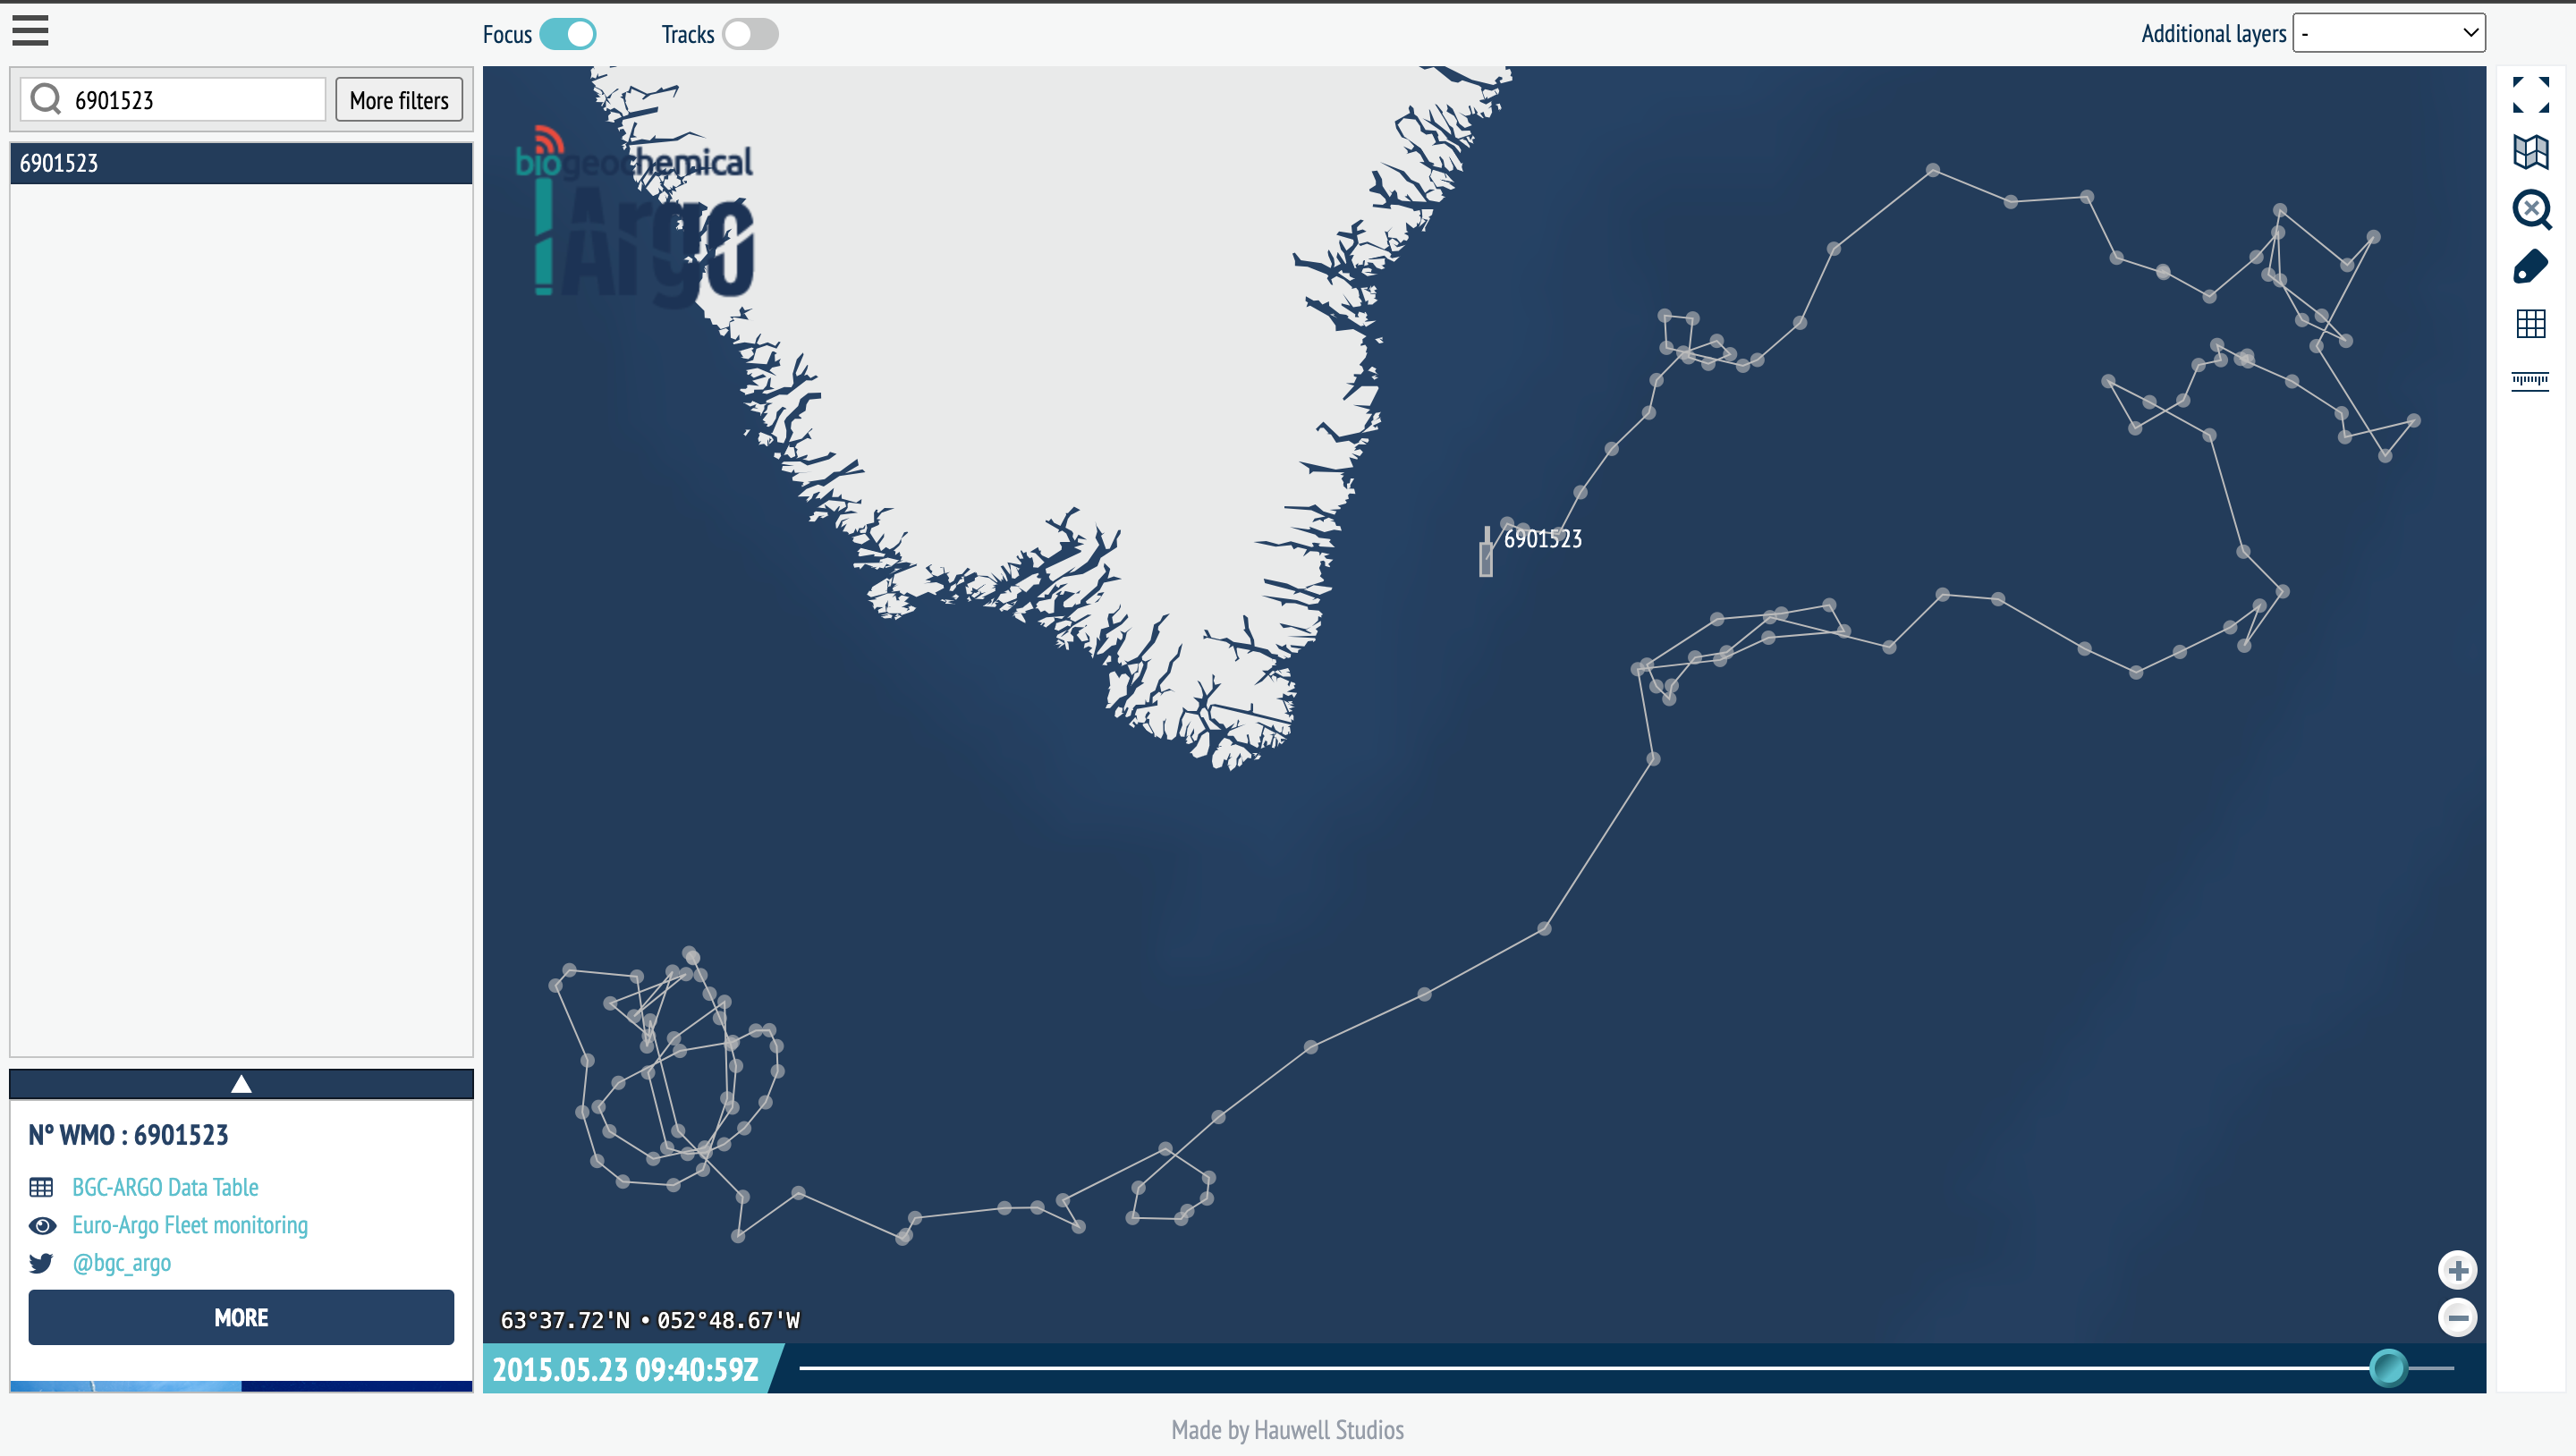

Once you have settled on the float and region of interest modify the FLOAT_NUMBER line in the following Python code to reflect the float number you have selected, and run it.

In [ ]:
#Float Number (change as required): 
#6901523; 6901515; 6901658; 6901573; 6900807; 
#6901528; 6901648; 6901582; 6901004; 6901585
FLOAT_NUMBER = '6901658'

## Reading BGC-Argo float data using Python

Having selected the BGC-Argo float we then need to read the data using Python. 

The first thing we will do is find out the type of BGC-Argo float we are using, the Principal Investigator (PI) in charge of it, and the project it was develop for. 

Run the following lines of code. Make note of the comments (# words in green) so you get a feel for how the Python code works.

In [ ]:
#Read the BGC-Argo netCDF file into Python
BGC_DATA     = FLOAT_NUMBER+'_Sprof.nc'
fh           = Dataset(BGC_DATA, mode='r')

#Read key information on the float
PROJECT_NAME  = fh.variables['PROJECT_NAME'][:]
PI_NAME       = fh.variables['PI_NAME'][:]
PLATFORM_TYPE = fh.variables['PLATFORM_TYPE'][:]
CYCLE_NUMBER  = fh.variables['CYCLE_NUMBER'][:]

print('Project Name =', str(PROJECT_NAME[0].tobytes(), 'utf-8'))
print('PI Name =', str(PI_NAME[0].tobytes(), 'utf-8'))
print('Platform Type =', str(PLATFORM_TYPE[0].tobytes(), 'utf-8'))
print('Maximum Cycle Number =', str(np.max(CYCLE_NUMBER)))

The code outputs the Project Name, PI name, Platform Type and maximum cycle number (i.e. number of profiles). The Project Name and PI name is important as they both should be appropriately recognised should we use the data (e.g. for a scientific publication), or contacted if there are any issues. If ARGO data are used for scientific publication, you should always acknowledge the ARGO programme too (see http://www.argodatamgt.org/Legal-notice-acknowledgements/Acknowledgements). The Platform Type provides the type of BGC-Argo float we are using. Information on the type of float can be found here https://argo.ucsd.edu/how-do-floats-work/float-types/ and may be useful for your coursework.

Having determined the Project Name, PI name, Platform Type and maximum cycle number, next we will read in the variables of interest into Python and convert the time variable from Julian day relative to a reference time, to a format we are more familiar with. The next cell of code does the following

1. Reads the variables of interest from the netCDF file (note the specific names of the variables that need to be read in).
2. Use Python functions to convert the time variable from Julian day to Year-Month-Day, useful when plotting a time-series.
3. Create a matrix of time (for every depth variable) that will be used later for the contour plot.

Run the following lines of code. Make note of the comments (# words in green) so you get a feel for how the Python code works.

In [ ]:
#Read time and locations of profiles 
JULD         = fh.variables['JULD'][:]            #Julian day of the profile.
LONGITUDE    = fh.variables['LONGITUDE'][:]       #Longitude degrees East
LATITUDE     = fh.variables['LATITUDE'][:]        #Latitude degress North

#Read netCDF CORE ARGO
PRESSURE     = fh.variables['PRES'][:]            #Pressure (Dbar) we assume equivalent to depth (m)
TEMP         = fh.variables['TEMP'][:]            #Temperature (degress C)
PSAL         = fh.variables['PSAL'][:]            #Salinity (PSU)

#Read netCDF BGC ARGO ADJUSTED (s-profile)
CHLA         = fh.variables['CHLA_ADJUSTED'][:]   #Chlorophyll-a 
BBP          = fh.variables['BBP700_ADJUSTED'][:] #Backscattering at 700nm (m^-1)
DISS_OXY     = fh.variables['DOXY_ADJUSTED'][:]   #Dissolved Oxygen (micro mole kg^-3)
fh.close()

#Convert time from Julian day to Year-Month-Day T HOUR:MINUTE:SECOND
REFERENCE_DATE = 2433282.50000  #JULIAN DATE for reference 1950-01-01 00:00:00
TIME_BGC       = np.empty(len(JULD), dtype='datetime64[s]')
MONTH_BGC      = np.empty(len(JULD), dtype='datetime64[s]')
for i in range(len(JULD)):
    TIME_BGC[i] = julian.from_jd(JULD[i]+REFERENCE_DATE, fmt='jd')
    
#Create a time matrix needed later for the contour plot (providing time for each depth level)
TIME_BGC_MATRIX = np.empty([len(TEMP[:,0]),len(TEMP[0,:])], dtype='datetime64[s]')
for i in range(len(TEMP[0,:])):
    TIME_BGC_MATRIX[:,i] = TIME_BGC

## Plotting BGC-Argo float data using Python

### Latitude and longitude plot

We have now read the data from the netCDF file. 

First, let's produce a plot of the locations of the float profiles from the start of its mission to the end.  

Run the following lines of code. Make note of the comments (# words in green) so you get a feel for how the Python code works.

In [ ]:
#Figure parameters that can be changed
XSIZE           = 7               #Define the xsize of the figure window
YSIZE           = 7               #Define the ysize of the figure window
Title_font_size = 15              #Define the font size of the titles
Label_font_size = 12              #Define the font size of the labels
Title           = "Figure 1"      #Plot title
cmap            = mpl.cm.plasma   #Defines the colour scale 
                                  #try mpl.cm.copper; mpl.cm.cividis; mpl.cm.winter
                                  #or other colour scales see 
                                  #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#Define the figure window
plt.figure(figsize=(XSIZE, YSIZE))

#If float selected is in South Pacific the float crosses the date line
#which causes the plot trouble. These lines of code fix the plot for visual purposes 
if FLOAT_NUMBER == '6901658':
    index_1 =np.where(LONGITUDE > 175)
    LONGITUDE[index_1] = LONGITUDE[index_1]-360

#Plot the latitude and lonitude of the float    
plt.plot(LONGITUDE,LATITUDE)

#Loop thorugh profiles and colour according to time

for i in range(len(JULD)):
    plt.plot(LONGITUDE[i],LATITUDE[i], color = cmap(i / float(len(JULD))), marker='o')

#Define labels of plot   
plt.ylabel('Latitude ($^o$ N)', fontsize = Title_font_size) 
plt.xlabel('Longitude ($^o$ E)', fontsize = Title_font_size) 
plt.yticks(fontsize = Label_font_size)
plt.xticks(fontsize = Label_font_size)
plt.title(Title, fontsize = Title_font_size)

#If float selected is in South Pacific the float crosses the date line
#which causes the plot trouble. These lines of code fix the plot for visual purposes
if FLOAT_NUMBER == '6901658':
    plt.xticks([-184,-182,-180,-178,-176,-174,-172,-170],
               ['176','178','180','-178','-176','-174','-172','-170'],fontsize=12)

#Add colourbar 
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap),
             ticks=[0, 1], orientation='horizontal',ax=plt.gca())
cbar.ax.set_xticklabels(['Float-start', 'Float-finish'], size='large')  # horizontal colorba

#Complete the plot
plt.show()

Figure 1 above shows the track of the float. You can compare it with the tracks on the OAO portal for the same float to cross-check. The plot shows the extent to which the float drifted during its lifespan. 

You can modify the plot by changing the parameters at the top of the code, specifically: XSIZE, YSIZE, Title_FONT_SIZE, Label_FONT_SIZE, Title and cmap. Try to make the plot your own, and if you feel confident about changing other parts you can but be careful not to break the code. Once you are happy with it, you can right click and save the image to a safe location.

### Profile plots

Next, let's plot vertical data from a single profile from the float to see how the variables change with depth.

Run the following lines of code. Make note of the comments (# words in green) so you get a feel for how the Python code works.

In [ ]:
#Figure parameters that can be changed 
INDEX_PROFILE   = 80    #Cycle number, it can be changed to look at different profiles
XSIZE           = 18    #Define the xsize of the figure window
YSIZE           = 6     #Define the ysize of the figure window
Title_font_size = 18    #Define the font size of the titles
Label_font_size = 15    #Define the font size of the labels
Title           = "Figure 2"      #Plot title
TEMP_MARKER     = 'o'   #Temperature markers see https://matplotlib.org/3.3.1/api/markers_api.html
TEMP_COLOUR     = 'c'   #Temperature colours see https://matplotlib.org/2.0.2/api/colors_api.html
PSAL_MARKER     = 'o'   #Salinity markers see https://matplotlib.org/3.3.1/api/markers_api.html
PSAL_COLOUR     = 'y'   #Salinity colours see https://matplotlib.org/2.0.2/api/colors_api.html
DOXY_MARKER     = 'o'   #Dissolved Oxy markers see https://matplotlib.org/3.3.1/api/markers_api.html
DOXY_COLOUR     = 'b'   #Dissolved Oxy colours see https://matplotlib.org/2.0.2/api/colors_api.html
CHLA_MARKER     = 'o'   #Chla markers see https://matplotlib.org/3.3.1/api/markers_api.html
CHLA_COLOUR     = 'g'   #Chla colours see https://matplotlib.org/2.0.2/api/colors_api.html
BBP_MARKER      = 'o'   #backscattering markers see https://matplotlib.org/3.3.1/api/markers_api.html
BBP_COLOUR      = 'm'   #backscattering colours see https://matplotlib.org/2.0.2/api/colors_api.html

#Check INDEX_PROFILE is greater than maximum cycle number
if INDEX_PROFILE > np.max(CYCLE_NUMBER):
    print("ERROR INDEX_PROFILE number is higher than maximum cycle number")

#Check INDEX_PROFILE is less than minimum cycle number
if INDEX_PROFILE < np.min(CYCLE_NUMBER):
    print("ERROR INDEX_PROFILE number is lower than minimum cycle number")

#If between max and min then begin plot
if INDEX_PROFILE >= np.min(CYCLE_NUMBER) and INDEX_PROFILE <= np.max(CYCLE_NUMBER):
    
    #Python indexes starts at 0, whereas cycle starts at 1, so we minus 1 so make index same as cycle
    INDEX_PROFILE = INDEX_PROFILE - 1 
    
    #Define the figure window including 5 subplots orientated horizontally
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharey=True, figsize=(XSIZE,YSIZE), \
    gridspec_kw={'hspace': 0})

    #Temperature subplot
    ax1.plot(TEMP[INDEX_PROFILE,:],PRESSURE[INDEX_PROFILE,:], \
         color = TEMP_COLOUR, marker = TEMP_MARKER, linestyle = 'None')
    ax1.set_ylabel('Depth (m)', fontsize=Title_font_size)
    ax1.yaxis.set_tick_params(labelsize=Label_font_size)
    ax1.set_ylim([200,0]) 
    ax1.set_xlabel('Temperature ($^o$C)', fontsize=Title_font_size, color = TEMP_COLOUR)
    ax1.xaxis.set_tick_params(labelsize=Label_font_size)
    ax1.set_xlim(xmin=np.min(TEMP[INDEX_PROFILE,:])-0.5, xmax=np.max(TEMP[INDEX_PROFILE,:])+0.5)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(2))
    
    #Salinity subplot
    ax2.plot(PSAL[INDEX_PROFILE,:],PRESSURE[INDEX_PROFILE,:], \
         color = PSAL_COLOUR, marker = PSAL_MARKER, linestyle = 'None') 
    ax2.set_xlabel('Salinity (PSU)', fontsize=Title_font_size, color = PSAL_COLOUR)
    ax2.xaxis.set_tick_params(labelsize=Label_font_size)
    ax2.set_xlim(xmin=np.min(PSAL[INDEX_PROFILE,:])-0.05,xmax=np.max(PSAL[INDEX_PROFILE,:])+0.05)
    ax2.xaxis.set_major_locator(plt.MaxNLocator(2))
    
    #Dissolved Oxygen subplot
    ax3.set_title(Title+""+'   '+""+np.datetime_as_string(TIME_BGC[INDEX_PROFILE], unit='D'), fontsize=Title_font_size, color='k')
    ax3.plot(DISS_OXY[INDEX_PROFILE,:],PRESSURE[INDEX_PROFILE,:], \
         color = DOXY_COLOUR, marker = DOXY_MARKER, linestyle = 'None') 
    ax3.set_xlabel('DOXY (micro mol kg$^{-3}$)', fontsize=Title_font_size, color= DOXY_COLOUR)

    ax3.xaxis.set_tick_params(labelsize=Label_font_size)
    ax3.set_xlim(xmin=np.min(DISS_OXY[INDEX_PROFILE,:])-10,xmax=np.max(DISS_OXY[INDEX_PROFILE,:])+10)
    ax3.xaxis.set_major_locator(plt.MaxNLocator(2))
    
    #Chl-a subplot
    ax4.plot(CHLA[INDEX_PROFILE,:],PRESSURE[INDEX_PROFILE,:], \
               color = CHLA_COLOUR, marker = CHLA_MARKER, linestyle = 'None')  
    ax4.set_xlabel('Chl-a (mg m$^{-3}$)', fontsize=Title_font_size, color = CHLA_COLOUR)
    ax4.xaxis.set_tick_params(labelsize=Label_font_size)
    ax4.set_xlim(xmin=np.min(CHLA[INDEX_PROFILE,:])-0.05,xmax=np.max(CHLA[INDEX_PROFILE,:])+0.05)
    ax4.xaxis.set_major_locator(plt.MaxNLocator(2))
    
    #Backscattering subplot
    ax5.plot(BBP[INDEX_PROFILE,:],PRESSURE[INDEX_PROFILE,:], \
               color = BBP_COLOUR, marker = BBP_MARKER, linestyle = 'None')  
    ax5.set_xlabel('$b_{bp}$ (m$^{-1}$)', fontsize=Title_font_size, color = BBP_COLOUR)
    ax5.xaxis.set_tick_params(labelsize=Label_font_size)
    ax5.set_xlim(xmin=np.min(BBP[INDEX_PROFILE,:])-0.0001,xmax=np.max(BBP[INDEX_PROFILE,:])+0.0001)
    ax5.xaxis.set_major_locator(plt.MaxNLocator(2))
    #Complete the plot
    plt.show()

Figure 2 above shows a vertical profile of variables from the float in the top 200m for a given cycle number. 

You can change the profile by changing the profile number in the code (under INDEX_PROFILE). Note the number has to be between the minimum and maximum number of float cycles. 

You can modify the presentation of the figure by changing the parameters at the top of the code, specifically: XSIZE; YSIZE; Title_font_size; Label_font_size; Title; TEMP_MARKER; TEMP_COLOUR; PSAL_MARKER; PSAL_COLOUR; DOXY_MARKER; DOXY_COLOUR; CHLA_MARKER; CHLA_COLOUR; BBP_MARKER; and BBP_COLOUR. Try to make the plot your own, and if you feel confident about changing other parts you can but be careful not to break the code. Once you are happy with it, you can right click and save the image to a safe location. You could produce a few profiles at different stages of the float’s life. 

### Contour plots

Whereas these individual profiles are nice to see, viewing the data from all profiles in one plot is very useful for understanding how the data changes over the lifetime of the float, and understanding seasonal cycles. To do this we will produce a contour plot of the BGC-Argo float data.

While the s-files provide each variable on the same pressure (depth) axis, some sensors sample at a higher frequency than others. This results in gaps in data for some variables. For the purposes of the plot, we will interpolate (linearly) the data for each variable, such that we have a value for each variable on every pressure level (depth axis). The advantage of doing this is that we can produce a nice contour plot, with data for every depth. The disadvantage is that it can have the potential to introduce artifacts onto the plot, for example, from interpolating data with only a few measurements over large depth ranges.

The following lines of code loop through each profile and use the interpolate function in Python to fill data in the missing depth bins. Note for the backscattering variable, we also use a median filter (11 point) to remove spikes in the data (for cases where we have more than 11 data points) as we are interested in the smoothed fields (though the spikes can provide very useful information on large particles, see Briggs et al. 2020 https://doi.org/10.1126/science.aay1790)

Run the following lines of code. Make note of the comments (# words in green) so you get a feel for how the Python code works.

In [ ]:
#Define new interpolated maxrices the same size as the existsing ones
TEMP_INT     = np.empty([len(TEMP[:,0]),len(TEMP[0,:])])
PSAL_INT     = np.empty([len(TEMP[:,0]),len(TEMP[0,:])])
CHLA_INT     = np.empty([len(TEMP[:,0]),len(TEMP[0,:])])
BBP_INT      = np.empty([len(TEMP[:,0]),len(TEMP[0,:])])
DISS_OXY_INT = np.empty([len(TEMP[:,0]),len(TEMP[0,:])])

#Loop through each profile (float cycle)
for i in range(len(JULD)):
    
    #Temperature data interpolation
    a      = TEMP[i,:]
    b      = PRESSURE[i,:]
    valid1 = np.logical_not(ma.getmask(b))
    valid2 = np.logical_not(ma.getmask(a))
    a      = a[valid2]
    c      = b[valid2]
    a      = a.compressed()
    b      = b.compressed()
    if len(a) > 1:
        interpfunc         = interpolate.interp1d(c,a, kind='linear',fill_value="extrapolate")
        xxx                = interpfunc(b)
        TEMP_INT[i,valid1] = xxx
        
    #Salinity data interpolation        
    a      = PSAL[i,:]
    b      = PRESSURE[i,:]
    valid1 = np.logical_not(ma.getmask(b))
    valid2 = np.logical_not(ma.getmask(a))
    a      = a[valid2]
    c      = b[valid2]
    a      = a.compressed()
    b      = b.compressed()
    if len(a) > 1:
        interpfunc    = interpolate.interp1d(c,a, kind='linear',fill_value="extrapolate")
        xxx           = interpfunc(b)
        PSAL_INT[i,valid1] = xxx
        
    #Dissolved Ocygen data interpolation 
    a      = DISS_OXY[i,:]
    b      = PRESSURE[i,:]
    valid1 = np.logical_not(ma.getmask(b))
    valid2 = np.logical_not(ma.getmask(a))
    a     = a[valid2]
    c     = b[valid2]
    a     = a.compressed()
    b     = b.compressed()
    if len(a) > 1:
        interpfunc    = interpolate.interp1d(c,a, kind='linear',fill_value="extrapolate")
        xxx           = interpfunc(b)
        DISS_OXY_INT[i,valid1] = xxx
        
    #Chlorophyll-a data interpolation    
    a      = CHLA[i,:]
    b      = PRESSURE[i,:]
    valid1 = np.logical_not(ma.getmask(b))
    valid2 = np.logical_not(ma.getmask(a))
    a      = a[valid2]
    c      = b[valid2]
    a      = a.compressed()
    b      = b.compressed()
    if len(a) > 1:
        interpfunc    = interpolate.interp1d(c,a, kind='linear',fill_value="extrapolate")
        xxx           = interpfunc(b)
        CHLA_INT[i,valid1] = xxx
        
    #Backscattering data interpolation             
    a      = BBP[i,:]
    b      = PRESSURE[i,:]
    valid1 = np.logical_not(ma.getmask(b))
    valid2 = np.logical_not(ma.getmask(a))
    a      = a[valid2]
    c      = b[valid2]
    a      = a.compressed()
    b      = b.compressed()
    if len(a) > 1:
        interpfunc    = interpolate.interp1d(c,a, kind='linear',fill_value="extrapolate")
        xxx           = interpfunc(b)
        #Median filter the backscattering data for profiles with more than 11 data points
        if len(xxx) > 11:
            BBP_INT[i,valid1] = scipy.signal.medfilt(xxx, kernel_size=11)
        if len(xxx) < 11:
            BBP_INT[i,valid1] = xxx
            
#Interpolation function for TEMP behaved strangely for a few floats
#producing very high Temp values for a few data points related (I think) to the linear 
#extrapolation. This code was added to remove these few points (nan them)
index_T            = (TEMP_INT>=50.)
TEMP_INT[index_T]  = np.nan

Having interpolated the data, next we will produce a contour plot. Here we will produce a single figure with five subplots, all on the same time and depth axis.

Run the following lines of code to produce a contour plot. Make note of the comments (# words in green) so you get a feel for how the Python code works.

In [ ]:
#Figure parameters that can be changed 
TEMP_COL          = mpl.cm.magma  #Temp colour scale (see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
PSAL_COL          = mpl.cm.winter #Salinity colour scale (see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
DOXY_COL          = mpl.cm.copper #Diss OXY colour scale (see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
CHLA_COL          = mpl.cm.viridis#Chl-a colour scale (see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
BBP_COL           = mpl.cm.cividis#bbp colour scale (see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
XSIZE             = 15            #Define the xsize of the figure window
YSIZE             = 15            #Define the ysize of the figure window
Title_font_size   = 15            #Define the font size of the titles
Label_font_size_x = 11            #Define the font size of the x-labels
Label_font_size_y = 13            #Define the font size of the y-labels
Cbar_title_size   = 15            #Define the font size of the Colourbar title
Cbar_label_size   = 13            #Define the font size of the Colourbar labels
Percentiles_upper = 99            #Upper percentiles used to constrain the colour scale
Percentiles_lower = 1             #Upper percentiles used to constrain the colour scale

#Define the figure window including 5 subplots orientated vertically
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, figsize=(XSIZE,YSIZE), \
    gridspec_kw={'hspace': 0.2})

#SUBPLOT 1: TEMPERATURE TIME-SERIES
##Constrain data to be between 1 and 99 percentile (avoids outliers in data colour scaling)
IN_DATA        = TEMP_INT
PCT_1          = np.nanpercentile(TEMP.compressed(), Percentiles_lower)
PCT_2          = np.nanpercentile(TEMP_INT, Percentiles_upper)
valid          = (IN_DATA < PCT_1)
IN_DATA[valid] = PCT_1
valid          = (IN_DATA > PCT_2)
IN_DATA[valid] = PCT_2
##Define colour levels
levels         = np.arange(PCT_1, PCT_2+((PCT_2-PCT_1)/49.), (PCT_2-PCT_1)/50.)
im1            = ax1.contourf(TIME_BGC_MATRIX, PRESSURE, IN_DATA, levels,cmap = TEMP_COL)
##Set axis info and titles
ax1.set_ylim([200,0]) 
ax1.set_ylabel('Depth (m)', fontsize= Title_font_size, color='k')
ax1.set_title('Temperature ($^o$C)', fontsize = Title_font_size, color='k')
ax1.yaxis.set_tick_params(labelsize= Label_font_size_y)
##Add colourbar
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.ax.locator_params(nbins=5)
cbar1.set_label("$^o$C", size  = Cbar_title_size)
cbar1.ax.tick_params(labelsize = Cbar_label_size)

#SUBPLOT 2: SALINITY TIME-SERIES
##Constrain data to be between 1 and 99 percentile (avoids outliers in data colour scaling)
IN_DATA        = PSAL_INT
PCT_1          = np.nanpercentile(PSAL.compressed(), Percentiles_lower)
PCT_2          = np.nanpercentile(PSAL_INT, Percentiles_upper)
valid          = (IN_DATA < PCT_1)
IN_DATA[valid] = PCT_1
valid          = (IN_DATA > PCT_2)
IN_DATA[valid] = PCT_2
##Define colour levels
levels         = np.arange(PCT_1, PCT_2+((PCT_2-PCT_1)/49.), (PCT_2-PCT_1)/50.)
im2 = ax2.contourf(TIME_BGC_MATRIX, PRESSURE, IN_DATA, levels, cmap = PSAL_COL)
##Set axis info and titles
ax2.set_ylim([200,0]) 
ax2.set_ylabel('Depth (m)', fontsize= Title_font_size, color='k')
ax2.set_title('Salinity (PSU)', fontsize= Title_font_size, color='k')
ax2.yaxis.set_tick_params(labelsize= Label_font_size_y)
##Add colourbar
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.ax.locator_params(nbins=5)
cbar2.set_label("PSU", size    = Cbar_title_size)
cbar2.ax.tick_params(labelsize = Cbar_label_size)

#SUBPLOT 3: DISSOLVED OXYGEN TIME-SERIES
#Constrain data to be between 1 and 99 percentile (avoids outliers in data colour scaling)
IN_DATA        = DISS_OXY_INT
PCT_1          = np.nanpercentile(DISS_OXY.compressed(), Percentiles_lower)
PCT_2          = np.nanpercentile(DISS_OXY_INT, Percentiles_upper)
valid          = (IN_DATA < PCT_1)
IN_DATA[valid] = PCT_1
valid          = (IN_DATA > PCT_2)
IN_DATA[valid] = PCT_2
##Define colour levels
levels         = np.arange(PCT_1, PCT_2+((PCT_2-PCT_1)/49.), (PCT_2-PCT_1)/50.)
im3 = ax3.contourf(TIME_BGC_MATRIX, PRESSURE, IN_DATA, levels,cmap = DOXY_COL)
##Set axis info and titles
ax3.set_ylim([200,0]) 
ax3.set_ylabel('Depth (m)', fontsize= Title_font_size, color='k')
ax3.set_title('Dissolved Oxygen (micro mol kg$^{-3}$)', fontsize= Title_font_size, color='k')
ax3.yaxis.set_tick_params(labelsize= Label_font_size_y)
##Add colourbar
cbar3 = fig.colorbar(im3, ax=ax3)
cbar3.ax.locator_params(nbins=5)
cbar3.set_label("micro mol kg$^{-3}$", size= Cbar_title_size)
cbar3.ax.tick_params(labelsize= Cbar_label_size)

#SUBPLOT 4: CHLOROPHYLL-A TIME-SERIES
##Set any CHl-a data below 0.001 to 0.001 (minimim detectable limit)
valid          = (CHLA_INT < 0.001).nonzero()
CHLA_INT[valid]= 0.001
##Constrain data to be between 1 and 99 percentile (avoids outliers in data colour scaling)
IN_DATA        = CHLA_INT
PCT_1          = np.nanpercentile(CHLA.compressed(), Percentiles_lower)
PCT_2          = np.nanpercentile(CHLA_INT, Percentiles_upper)
valid          = (IN_DATA < PCT_1)
IN_DATA[valid] = PCT_1
valid          = (IN_DATA > PCT_2)
IN_DATA[valid] = PCT_2
##Define colour levels
levels         = np.arange(PCT_1, PCT_2+((PCT_2-PCT_1)/49.), (PCT_2-PCT_1)/50.)
im4 = ax4.contourf(TIME_BGC_MATRIX, PRESSURE, IN_DATA, levels, cmap = CHLA_COL)
##Set axis info and titles
ax4.set_ylim([200,0]) 
ax4.set_ylabel('Depth (m)', fontsize= Title_font_size, color='k')
ax4.set_title('Chl-a (mg m$^{-3}$)', fontsize= Title_font_size, color='k')
ax4.yaxis.set_tick_params(labelsize= Label_font_size_y)
##Add colourbar
cbar4 = fig.colorbar(im4, ax=ax4)
cbar4.ax.locator_params(nbins=5)
cbar4.set_label("mg m$^{-3}$", size = Cbar_title_size)
cbar4.ax.tick_params(labelsize = Cbar_label_size)

#SUBPLOT 5: BBP TIME-SERIES
##Constrain data to be between 1 and 99 percentile (avoids outliers in data colour scaling)
IN_DATA        = BBP_INT
PCT_1          = np.nanpercentile(BBP.compressed(), Percentiles_lower)
PCT_2          = np.nanpercentile(BBP_INT, Percentiles_upper)
valid          = (IN_DATA < PCT_1)
IN_DATA[valid] = PCT_1
valid          = (IN_DATA > PCT_2)
IN_DATA[valid] = PCT_2
##Define colour levels
levels         = np.arange(PCT_1, PCT_2+((PCT_2-PCT_1)/49.), (PCT_2-PCT_1)/50.)
im5 = ax5.contourf(TIME_BGC_MATRIX, PRESSURE, IN_DATA, levels,cmap = BBP_COL)
##Set axis info and titles
ax5.set_ylim([200,0]) 
ax5.set_ylabel('Depth (m)', fontsize= Title_font_size, color='k')
ax5.set_title('$b_{bp}$ (m$^{-1}$)', fontsize= Title_font_size, color='k')
ax5.yaxis.set_tick_params(labelsize= Label_font_size_y)
ax5.xaxis.set_tick_params(labelsize= Label_font_size_x)
ax5.set_xlabel('Time', fontsize=15, color='k')
##Add colourbar
cbar5 = fig.colorbar(im5, ax=ax5)
cbar5.ax.locator_params(nbins=5)
cbar5.set_label("m$^{-1}$", size = Cbar_title_size)
cbar5.ax.tick_params(labelsize = Cbar_label_size)
plt.show()

The above figure shows a time-series of data from the BGC-Argo float you selected in the top 200m.

You can change components of the plot by changing the parameters at the top of the code. Like previous plots, try to make the plot your own, and if you feel confident about changing other parts you can, but be careful not to break the code. Once you are happy with it, you can right click and save the image to a safe location.

Have a careful look at the plot. Are there any specific depth variations in the variables? Can you see any pronounced seasonal cycles in the magnitudes of the variables? Are temporal changes possibly related to spatial changes in the float location if it drifted during its lifetime (see Figure 1, also look at the float track in the OAO platform, and play with the background layers of satellite Chlorophyll-a so see if the float drifted between high and low Chl-a regions?).  

### Seasonal monthly climatology

To quantify monthly values for variables over the course of a season, we will compute the average of each variable in the top 100 m (roughly equivalent to the epipelagic zone) for each month of the year. To do that, we will loop through the months of the year, and find all the profiles that fall within a given month, and average all the data from those profiles in the top 100 m of the water column. In addition, we will compute the standard deviations of each variable, for each month, to understand the variance in the data. 

Run the following lines of code to produce a plot of month-by-month averages of variables. Make note of the comments (# words in green) so you get a feel for how the Python code works.

In [ ]:
#Figure parameters that can be changed 
INDEX_PROFILE      = 50    #Cycle number, it can be changed to look at different profiles
XSIZE              = 10    #Define the xsize of the figure window
YSIZE              = 18     #Define the ysize of the figure window
Title_font_size    = 18    #Define the font size of the titles
Label_font_size    = 15    #Define the font size of the labels
Title              = "Monthly averages in top 100 m"      #Plot title
TEMP_MARKER        = 'o'   #Temperature markers see https://matplotlib.org/3.3.1/api/markers_api.html
TEMP_COLOUR        = 'c'   #Temperature colours see https://matplotlib.org/2.0.2/api/colors_api.html
PSAL_MARKER        = 'o'   #Salinity markers see https://matplotlib.org/3.3.1/api/markers_api.html
PSAL_COLOUR        = 'y'   #Salinity colours see https://matplotlib.org/2.0.2/api/colors_api.html
DOXY_MARKER        = 'o'   #Dissolved Oxy markers see https://matplotlib.org/3.3.1/api/markers_api.html
DOXY_COLOUR        = 'b'   #Dissolved Oxy colours see https://matplotlib.org/2.0.2/api/colors_api.html
CHLA_MARKER        = 'o'   #Chla markers see https://matplotlib.org/3.3.1/api/markers_api.html
CHLA_COLOUR        = 'g'   #Chla colours see https://matplotlib.org/2.0.2/api/colors_api.html
BBP_MARKER         = 'o'   #backscattering markers see https://matplotlib.org/3.3.1/api/markers_api.html
BBP_COLOUR         = 'm'   #backscattering colours see https://matplotlib.org/2.0.2/api/colors_api.html
SPACE_BETWEEN_PLOT = 0.00  #try 0.05, 0.1 or 0.2 
DEPTH_OF_AVERAGE   = 100   #Based on the contour plot aboove is this a good representation of the euphotic zone?   

#Extract the month of each profile (used to find all data in a month)
MONTH_BGC          = pd.to_datetime(TIME_BGC).month

#Define months (1-12, JAN-DEC) that will be used int the for plot and loop
MONTH_PLOT         = np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.])
MONTH_PLOT_ST      = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

#Define empty arrays to dump averages and standard deviations for each month
TEMP_CLIM_100_AV   = np.empty(len(MONTH_PLOT))
TEMP_CLIM_100_SDV  = np.empty(len(MONTH_PLOT))
PSAL_CLIM_100_AV   = np.empty(len(MONTH_PLOT))
PSAL_CLIM_100_SDV  = np.empty(len(MONTH_PLOT))
DOXY_CLIM_100_AV   = np.empty(len(MONTH_PLOT))
DOXY_CLIM_100_SDV  = np.empty(len(MONTH_PLOT))
CHLA_CLIM_100_AV   = np.empty(len(MONTH_PLOT))
CHLA_CLIM_100_SDV  = np.empty(len(MONTH_PLOT))
BBP_CLIM_100_AV    = np.empty(len(MONTH_PLOT))
BBP_CLIM_100_SDV   = np.empty(len(MONTH_PLOT))

##Loop through months and find where a profile is in each month
for i in range(0, 12):
    MON_TMP              = i+1
    index                = (MONTH_BGC==MON_TMP)
    TEMP_INT_TMP         = TEMP_INT[index,:]
    PSAL_INT_TMP         = PSAL_INT[index,:]
    DISS_OXY_INT_TMP     = DISS_OXY_INT[index,:]
    CHLA_INT_TMP         = CHLA_INT[index,:]
    BBP_INT_TMP          = BBP_INT[index,:]
    PRESSURE_TMP         = PRESSURE[index,:]

    #Only selected data from profiles in a given month in top 100m
    #Compute averages and standard deviations
    index_100            = (PRESSURE_TMP<=DEPTH_OF_AVERAGE)
    TEMP_CLIM_100_AV[i]  = np.nanmean(TEMP_INT_TMP[index_100])
    TEMP_CLIM_100_SDV[i] = np.nanstd(TEMP_INT_TMP[index_100])
    PSAL_CLIM_100_AV[i]  = np.nanmean(PSAL_INT_TMP[index_100])
    PSAL_CLIM_100_SDV[i] = np.nanstd(PSAL_INT_TMP[index_100])
    DOXY_CLIM_100_AV[i]  = np.nanmean(DISS_OXY_INT_TMP[index_100])
    DOXY_CLIM_100_SDV[i] = np.nanstd(DISS_OXY_INT_TMP[index_100])
    CHLA_CLIM_100_AV[i]  = np.nanmean(CHLA_INT_TMP[index_100])
    CHLA_CLIM_100_SDV[i] = np.nanstd(CHLA_INT_TMP[index_100])
    BBP_CLIM_100_AV[i]   = np.nanmean(BBP_INT_TMP[index_100])
    BBP_CLIM_100_SDV[i]  = np.nanstd(BBP_INT_TMP[index_100])
    
    
#Plot data
fig, (ax1, ax2, ax3, ax4, ax5,) = plt.subplots(5, sharex=True, figsize=(XSIZE,YSIZE), \
    gridspec_kw={'hspace': SPACE_BETWEEN_PLOT})
#Temperature
ax1.errorbar(MONTH_PLOT, TEMP_CLIM_100_AV, TEMP_CLIM_100_SDV, ms=12, linestyle='None', 
             marker=TEMP_MARKER, color = TEMP_COLOUR)
ax1.set_title(Title, fontsize=Title_font_size, color='k')
ax1.set_ylabel('Temperature ($^o$C)', fontsize=Title_font_size, color=TEMP_COLOUR)
ax1.yaxis.set_tick_params(labelsize=Label_font_size)
ax1.xaxis.set_ticks(MONTH_PLOT)
ax1.set_xticklabels(MONTH_PLOT_ST)
#Salinity
ax2.errorbar(MONTH_PLOT, PSAL_CLIM_100_AV, PSAL_CLIM_100_SDV, ms=12, linestyle='None', 
             marker=PSAL_MARKER, color = PSAL_COLOUR)
ax2.set_ylabel('Salinity (PSU)', fontsize=Title_font_size, color=PSAL_COLOUR)
ax2.yaxis.set_tick_params(labelsize=Label_font_size)
ax2.xaxis.set_ticks(MONTH_PLOT)
ax2.set_xticklabels(MONTH_PLOT_ST)
#Dissolved Oxygen
ax3.errorbar(MONTH_PLOT, DOXY_CLIM_100_AV, DOXY_CLIM_100_SDV, ms=12, linestyle='None', 
             marker=DOXY_MARKER, color = DOXY_COLOUR)
ax3.set_ylabel('DOXY (micro mol kg$^{-3}$)', fontsize=Title_font_size, color=DOXY_COLOUR)
ax3.yaxis.set_tick_params(labelsize=Label_font_size)
ax3.xaxis.set_ticks(MONTH_PLOT)
ax3.set_xticklabels(MONTH_PLOT_ST)
#Chlorophyll-a
ax4.errorbar(MONTH_PLOT, CHLA_CLIM_100_AV, CHLA_CLIM_100_SDV, ms=12, linestyle='None', 
             marker=CHLA_MARKER, color = CHLA_COLOUR)
ax4.set_ylabel('Chl-a (mg m$^{-3}$)', fontsize=Title_font_size, color=CHLA_COLOUR)
ax4.yaxis.set_tick_params(labelsize=Label_font_size)
ax4.xaxis.set_ticks(MONTH_PLOT)
ax4.set_xticklabels(MONTH_PLOT_ST)
#Backscattering
ax5.errorbar(MONTH_PLOT, BBP_CLIM_100_AV, BBP_CLIM_100_SDV, ms=12, linestyle='None', 
             marker=BBP_MARKER, color = BBP_COLOUR)
ax5.set_ylabel('$b_{bp}$ (m$^{-1}$)', fontsize=Title_font_size, color=BBP_COLOUR)
ax5.set_xlabel('Month', fontsize=Title_font_size, color='k')
ax5.yaxis.set_tick_params(labelsize=Label_font_size)
ax5.xaxis.set_tick_params(labelsize=Label_font_size)
ax5.xaxis.set_ticks(MONTH_PLOT)
ax5.set_xticklabels(MONTH_PLOT_ST)
plt.show()

Figure 4 above shows monthly changes in variables from the float in the top 100m for a given cycle number. 

You can modify the presentation of the figure by changing the parameters at the top of the code. Try to make the plot your own, and if you feel confident about changing other parts you can but be careful not to break the code. Once you are happy with it, you can right click and save the image to a safe location. 

## Coursework assignment

### Context

A geoengineering company has been granted a licence to undertake some nutrient enrichment experiments in different regions of the ocean, to quantify the capacity of the ocean to sequencer CO2, when quantities of various nutrients are introduced artificially into the ocean. They have been granted permissions to conduct these experiments in eight different regions: the North Atlantic; the southern South Atlantic; the South Pacific; the northern Red Sea; the Black Sea; the Eastern Mediterranean Sea; the Western Mediterranean Sea; and the Southern Ocean. They plan on conducting the experiments during each season of the year (spring, summer, autumn and winter).

### Assignment

You have been assigned to use a BCG-Argo float to determine the typical physical and biogeochemical conditions over a full seasonal cycle in one of the regions of interest. The geoengineering company is particulalry interested in the following variables, in the top 100 m of the water column.

Physical variables
- Temperature 
- Salinity 

Biogeochemical variables
- Dissolved Oxygen (proxy for living conditions for organisms, required by plants and animals for respiration)
- Chlorophyll-a (proxy for phytoplankton biomass)
- Particulate backscattering (proxy for particulate organic carbon)

The physical variables will be useful to evaluate if physical conditions during the experiments are similar to typical ranges (you will observe). The biogeochemical variables will be useful for evaluating the response of the ecosystem to nutrient enrichment.

You are assigned to document your findings in a 1500 word scientific report (word count not including the title and reference list) that will be used by the geoengineering company as a reference from which to determine subsequent changes caused by nutrient enrichment (i.e. relative to typical conditions).

As a minimum your report should contain the following sections:

- Executive Summary (~200 words)
- Description of your region of interest
- Details of the Biogeochemical Argo Float used (sensors, track, cycles, duration)
- Seasonal Cycle (Winter, Spring, Summer, Autumn; note the dates will change depending on the hemisphere you are in)
- Potential issues and future recommendations
- Summary of report
- Reference list

Use figures and data generated from Practical 3 in your report and ensure your report references current literature and use standard (harvard) reference format.

## References

Bittig, H.C., Maurer, T.L., Plant, J.N., Wong, A.P., Schmechtig, C., Claustre, H., Trull, T.W., Udaya Bhaskar, T.V.S., Boss, E., Dall'Olmo, G. et al. (2019) A BGC-Argo guide: Planning, deployment, data handling and usage. Frontiers in Marine Science, 6, p.502. https://doi.org/10.3389/fmars.2019.00502

Bittig, H.C., Wong, A.P., Plant, J.N., and the Coriolis Argo data management team (2020). BGC- Argo synthetic profile file processing and format on Coriolis GDAC, v1.2 http://dx.doi.org/10.13155/55637

Briggs, N., Dall’Olmo, G. and Claustre, H., 2020. Major role of particle fragmentation in regulating biological sequestration of CO2 by the oceans. Science, 367(6479), pp.791-793. https://doi.org/10.1126/science.aay1790 